### Imports

In [109]:
import sys
import numpy as np
from math import sin, cos, atan2, pi

import pyvista as pv
from pyvista import examples
from pyvista import set_plot_theme
set_plot_theme('document')

import plotly.graph_objects as go

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline

## Creating Data

Each rows contains coordinates of a point in the order **X, Y, Z** in the range **[0, 1]**

In [91]:
def generateData(numPoints, angle, shift):
    
    aboutZ = np.array([[cos(angle[2]), sin(angle[2]), 0], 
                  [-sin(angle[2]), cos(angle[2]), 0],
                  [0, 0, 1]])
    aboutY = np.array([[cos(angle[1]), 0, sin(angle[1])],
                  [0, 1, 0] ,
                  [-sin(angle[1]), 0, cos(angle[1])]])
    aboutX = np.array([[1, 0, 0],
                      [0, cos(angle[0]), sin(angle[0])],
                      [0, -sin(angle[0]), cos(angle[0])]])
      
    T = shift
    R = aboutZ.dot(aboutY.dot(aboutX))
    sourceData = np.random.rand(numPoints, 3)
    movedData = sourceData.dot(R) + shift.T
    return sourceData, movedData

In [92]:
shift =  np.array([[-2], [2], [5]])
Xangle = pi/7
Yangle = pi/4
Zangle = pi/2
angle =  np.array([Xangle, Yangle, Zangle])
movedData, sourceData = generateData(10000, angle, shift)

## Plotting The Point Clouds

#### PyVista

PyVista (formerly vtki) is a helper module for the Visualization Toolkit (VTK) that takes a different approach on interfacing with VTK through NumPy and direct array access.

Now that you have a NumPy array of points/vertices either from our sample
data or your own project, creating a PyVista mesh of those points is simply:

In [93]:
sourceCloud = pv.PolyData(sourceData)
destinationCloud = pv.PolyData(movedData)

Nou can easily add NumPy data arrays that have a length equal to the number of points in the mesh along the
first axis. For example, lets add a few arrays to this new ``pointcloud`` mesh.

Make an array of scalar values with the same length as the points array.
Each element in this array will correspond to points at the same index:



In [94]:
# Create the data array using z-component of points array  and add it to the point cloud as "elevation"
Zsource = sourceData[:,-1]
sourceCloud["elevation"] = Zsource

Zmoved = movedData[:,-1]
destinationCloud["elevation"] = Zmoved

And now we can plot the point cloud with that data. PyVista is smart
enough to plot the scalar array you added by default. We also specify to render every point as its own sphere.



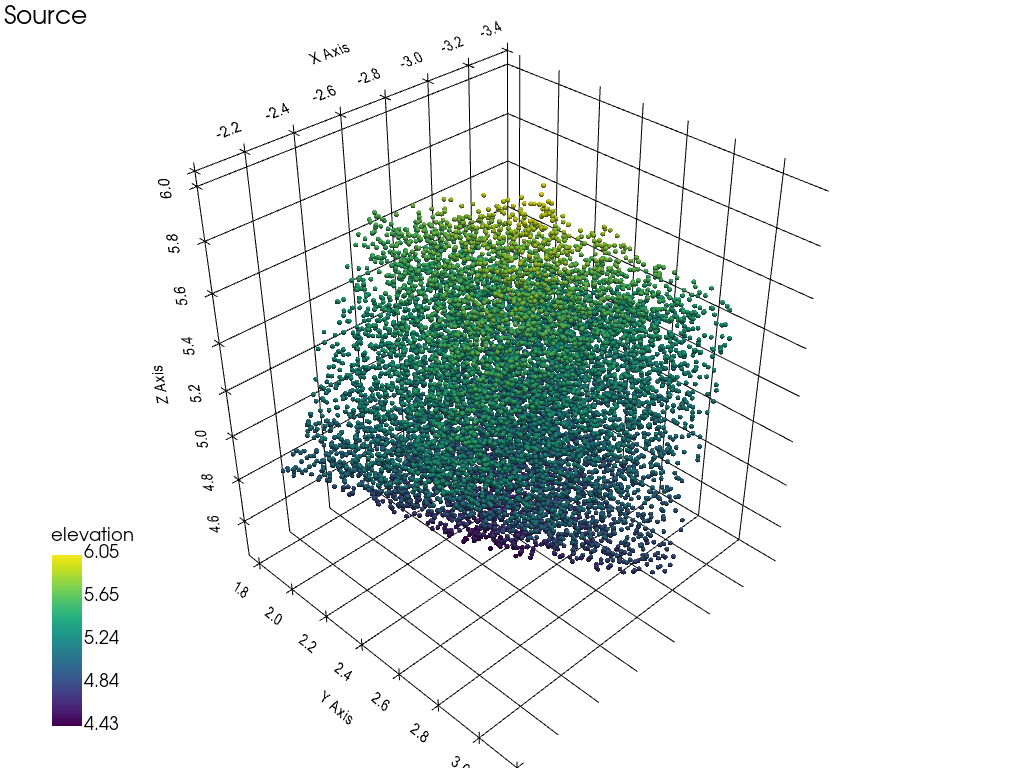

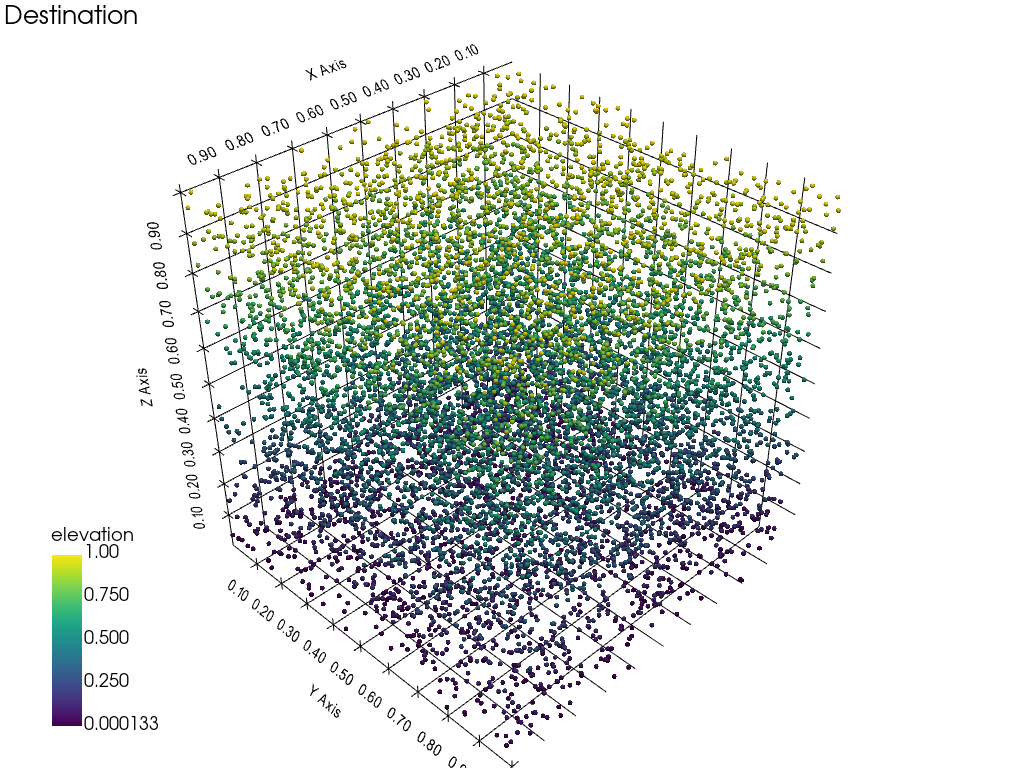

In [111]:
plotter = pv.Plotter()
sargs = dict(height=0.25, vertical=True, position_x=0.05, position_y=0.05)
plotter.add_text("Source", font_size=10)
plotter.add_mesh(sourceCloud, 
                 point_size = 5,
                 render_points_as_spheres = True,
                 scalar_bar_args=sargs)
plotter.show_grid()
plotter.show()

plotter = pv.Plotter()
plotter.add_text("Destination", font_size=10)
plotter.add_mesh(destinationCloud, 
                 point_size = 5,
                 render_points_as_spheres = True,
                 scalar_bar_args=sargs)
plotter.show_grid()
plotter.show()

In [ ]:
plotter = pv.Plotter()
sargs = dict(height=0.25, vertical=True, position_x=0.05, position_y=0.05)
plotter.add_text("Source", font_size=10)
plotter.add_mesh(sourceCloud, 
                 point_size = 5,
                 render_points_as_spheres = True,
                 scalar_bar_args=sargs)

plotter.add_text("Destination", font_size=10)
plotter.add_mesh(destinationCloud, 
                 point_size = 5,
                 render_points_as_spheres = True,
                 scalar_bar_args=sargs)
plotter.show_grid()
plotter.show()

#### Plotly

Plotly helps you view data in interactive plots and hence I used that to show the spiral point cloud data!

In [101]:
def generateSpiral(numPoints, angle, shift):
    
    aboutZ = np.array([[cos(angle[2]), sin(angle[2]), 0], 
                  [-sin(angle[2]), cos(angle[2]), 0],
                  [0, 0, 1]])
    aboutY = np.array([[cos(angle[1]), 0, sin(angle[1])],
                  [0, 1, 0] ,
                  [-sin(angle[1]), 0, cos(angle[1])]])
    aboutX = np.array([[1, 0, 0],
                      [0, cos(angle[0]), sin(angle[0])],
                      [0, -sin(angle[0]), cos(angle[0])]])
      
    T = shift
    R = aboutZ.dot(aboutY.dot(aboutX))
    sourceData = np.zeros((numPoints, 3))
    sourceData[:, 0] = range(0, numPoints)
    sourceData[:, 1] = 0.2 * sourceData[:, 0] * np.sin(0.5 * sourceData[:, 0]) 
    sourceData[:, 2] = 0.2 * sourceData[:, 0] * np.cos(0.5 * sourceData[:, 0]) 
    
    movedData = sourceData.dot(R) + shift.T
    return sourceData, movedData

In [102]:
def plotData(data1, data2, label1, label2):
    fig = go.Figure()
   

    # Data for three-dimensional scattered points
    xdata1 = data1[:, 0]
    ydata1 = data1[:, 1]
    zdata1 = data1[:, 2]

    fig.add_trace(go.Scatter3d(x = xdata1, y = ydata1, z = zdata1,
                                       mode='markers',
                                       marker=dict(
                                        size=5,
                                        opacity=0.8
                                       ),
                                       name=label1
                              ))

    
    xdata2 = data2[:, 0]
    ydata2 = data2[:, 1]
    zdata2 = data2[:, 2]
    fig.add_trace(go.Scatter3d(x = xdata2, y = ydata2, z = zdata2,
                                       mode='markers',
                                       marker=dict(
                                        size=5,
                                        opacity=0.8
                                       ),
                                       name=label2
                              ))
    
    fig.update_layout(
        title="Generated Point Clouds",
        scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200, 230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230, 200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
    )
    fig.show()

In [104]:
shift =  np.array([[-2], [2], [5]])
Xangle = pi/7
Yangle = pi/4
Zangle = pi/2
angle =  np.array([Xangle, Yangle, Zangle])
movedData, sourceData = generateSpiral(10, angle, shift)
plotData(sourceData, movedData, "Source data", "Moved data")

#### Matplotlib

In [121]:
def matplotData(data1, data2, label1, label2):
    ax = plt.axes(projection='3d')

    # Data for a three-dimensional line
#     xline1 = data1[:, 0]
#     yline1 = data1[:, 1]
#     zline1 = data1[:, 2]
#     ax.plot3D(xline1, yline1, zline1, 'gray')

    # Data for three-dimensional scattered points
    xdata1 = data1[:, 0]
    ydata1 = data1[:, 1]
    zdata1 = data1[:, 2]
    ax.scatter3D(xdata1, ydata1, zdata1);

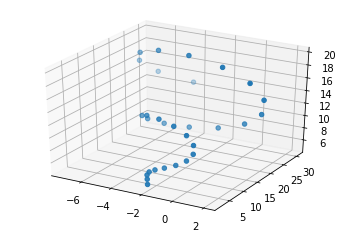

In [122]:
shift =  np.array([[-2], [2], [5]])
Xangle = pi/7
Yangle = pi/4
Zangle = pi/2
angle =  np.array([Xangle, Yangle, Zangle])
movedData, sourceData = generateSpiral(30, angle, shift)
matplotData(sourceData, movedData, "Source data", "Moved data")